# CodeSoft Machine Learning Internship Task 1

## MOVIE GENRE CLASSIFICATION

Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector Machines.

DATASET [CLICK HERE](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb)

## Importing

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Data Retrieval

In [127]:
# Load the dataset
df1 = pd.read_csv('C:\\Users\\rishi\Downloads\\Genre Classification Dataset\\train_data.txt', sep=":::", engine='python')
df2 = pd.read_csv('C:\\Users\\rishi\Downloads\\Genre Classification Dataset\\test_data.txt', sep=":::", engine='python')

In [128]:
df1.columns=['sign No.','Name of the Movie','genre','description']
df2.columns=['sign No.','Name of the Movie','description']

## DFA Process

In [129]:
#Verification
df1.columns

Index(['sign No.', 'Name of the Movie', 'genre', 'description'], dtype='object')

In [130]:
#Verification
df2.columns

Index(['sign No.', 'Name of the Movie', 'description'], dtype='object')

In [131]:
df1.head()

,sign No.,Name of the Movie,genre,description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [132]:
df2.head()

,sign No.,Name of the Movie,description
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [133]:
df1.describe()

,sign No.
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


## Visulization

<Axes: xlabel='genre'>

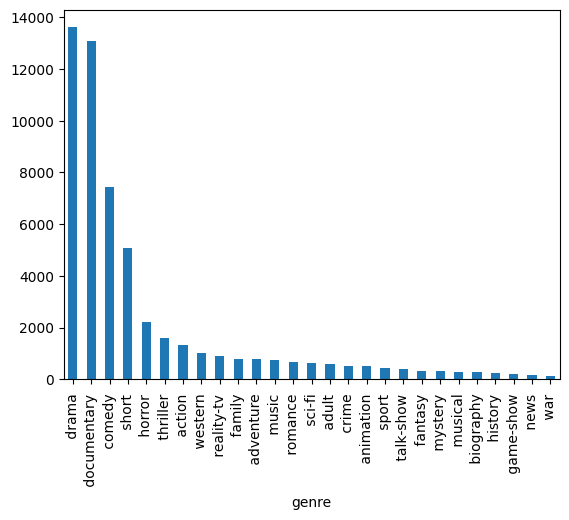

In [149]:
df1["genre"].value_counts().plot(kind='bar') 

## Imputation

### TF-IDF

In [134]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(df1['description'])
X_test_tfidf = tfidf_vectorizer.transform(df2['description'])

### Logical Regression

In [136]:
# Training the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [137]:
# Predictions on the validation set
y_val_pred = logreg_model.predict(X_val)

In [138]:
# Display the first few predicted genres
print("\nPredicted Genres on Validation Set:")
print(y_val_pred[:5])


Predicted Genres on Validation Set:
[' drama ' ' comedy ' ' drama ' ' documentary ' ' drama ']


## Predication for testing dataset

In [139]:
# Generate predictions for the testing dataset
test_predictions = logreg_model.predict(X_test_tfidf)

## Saving the dataset with Predictions

In [140]:

# Add predictions to the testing dataset
df2['predicted_genre'] = test_predictions

# Save predictions to a new CSV file
df2.to_csv("testing_dataset_with_predictions.csv", index=False)

print("\nPredictions saved to 'testing_dataset_with_predictions.csv'.")


Predictions saved to 'testing_dataset_with_predictions.csv'.


## Sample Predictions

In [147]:
df3=pd.read_csv("testing_dataset_with_predictions.csv")
df3.head(10)


,sign No.,Name of the Movie,description,predicted_genre
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",drama
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
3,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,drama
5,7,L'amica (1969),The beautiful but neglected wife of a brillia...,drama
6,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,comedy
7,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,documentary
8,10,Press (2011),Press is a story of young people overwhelmed ...,drama
9,11,The Firm Man (1975),Not much is known about the firm for which bu...,drama
